In [4]:
pip install pandas

     --------------------------------------- 10.8/10.8 MB 11.1 MB/s eta 0:00:00
     ------------------------------------- 502.3/502.3 kB 10.7 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 kB 10.7 MB/s eta 0:00:00
     --------------------------------------- 14.9/14.9 MB 16.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 17.4 MB/s eta 0:00:00
     ------------------------------------- 470.4/470.4 kB 28.8 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 22.4 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 26.9 MB/s eta 0:00:00
     -------------------------------------- 102.6/102.6 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [20]:
len(data[data.duplicated()])

0

In [22]:
data.apply(lambda x: len(x.unique()))

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [23]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [24]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['avg_score'] = (data['math_score'] + data['reading_score'] + data['writing_score'])/3
data[['total_score','avg_score']].describe()

,total_score,avg_score
count,1000.000000,1000.000000
mean,203.312000,67.770667
std,42.771978,14.257326
min,27.000000,9.000000
25%,175.000000,58.333333
50%,205.000000,68.333333
75%,233.000000,77.666667
max,300.000000,100.000000


In [27]:
#full score
full_avg = len(data[data['avg_score']==100])
print(f'Total No of full score - {full_avg}')

Total No of full score - 3


Data Visualization

<Axes: xlabel='avg_score', ylabel='Count'>

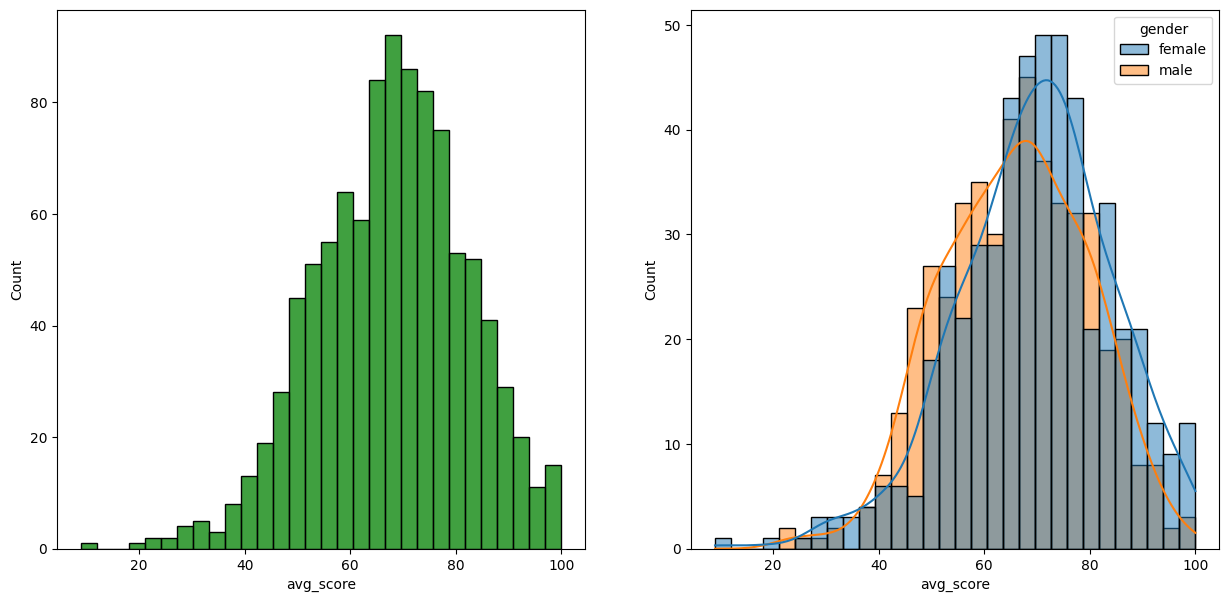

In [34]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=data,x='avg_score',bins=30,color='g',ax=ax1)
sns.histplot(data=data,x='avg_score',bins=30,color='g',ax=ax2,hue='gender',kde=True)

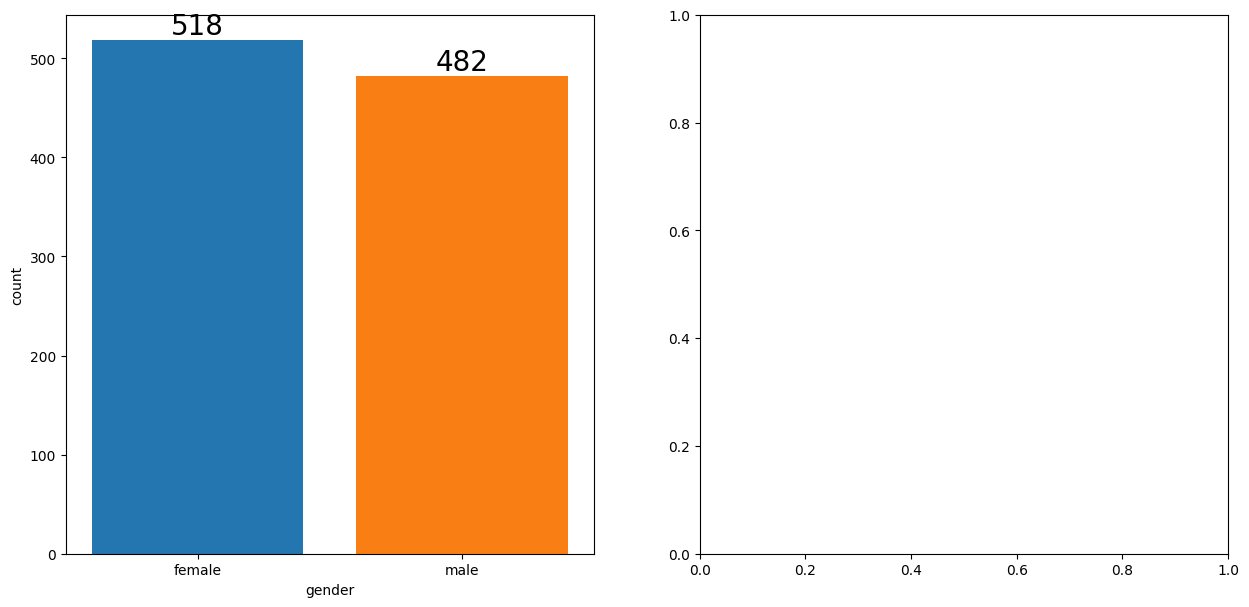

In [36]:
fig,ax= plt.subplots(1,2,figsize=(15,7))
sns.countplot(data=data,x='gender',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)